**Seasonal-state-Space representation**
$$y_t = \alpha_{t-s}+e_t$$
$$\alpha_t = \alpha_{t-s}+\gamma e_t$$
式中s表示所考虑数据的频次(如每月、每季、每周等)。例如，观察一个遵循特定动态的季度时间序列。
此外，在每个特定季度，时间序列都倾向于一个与去年同一季度相似的值。可以将该模型表示为:
$$y_t = \alpha_{t-4}+e_t$$
$$\alpha_t = \alpha_{t-4}+\gamma e_t$$

E:\Anaconda3\envs\pcl_deeplearning\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


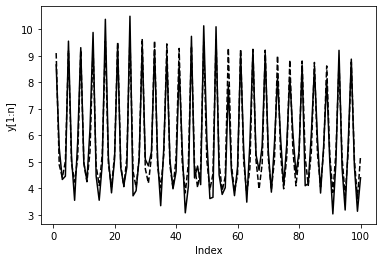

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
from cmath import *

random.seed(55)
n = 100
s = 4
e = [sqrt(.4)]*np.random.randn(n)
sfactor = [10]*np.random.rand(s).reshape((-1,1))
y = []
alpha = []
y.append(sfactor[0] + e[0])
y.append(sfactor[1] + e[1])
y.append(sfactor[2] + e[2])
y.append(sfactor[3] + e[3])
alpha.append(sfactor[0] + .2*e[0])
alpha.append(sfactor[1] + .2*e[1])
alpha.append(sfactor[2] + .2*e[2])
alpha.append(sfactor[3] + .2*e[3])
for t in range(4,n):
    alpha.append(alpha[t-s] + .2*e[t])
    y.append(alpha[t-s] + e[t])

y = list(np.array(y).T[0])
alpha = list(np.array(alpha).T[0])

plt.figure()
x = [(i + 1) for i in range(n)]
plt.plot(x, y, color='black')
plt.plot(x, alpha, linestyle='dashed', color='black')
plt.xlabel('Index')
plt.ylabel('y[1:n]')
plt.show()

In [2]:
# 假设每个季度都出现相同的因素，可以对模型进行如下估计:
import scipy.optimize as opt

s = 4
state = np.zeros(n).reshape((-1,1))
e = np.zeros(n).reshape((-1,1))
for i in range(s):
    state[i] = y[i]
def logLikConc(myparam):
    gamma = abs(myparam)
    for t in range(s,n):
        e[t] = y[t]-state[t-s]
        state[t] = state[t-s] + gamma*e[t]
    return sum(e[1:n]**2/(n-1))

myresults = opt.fmin(logLikConc, .4)
print("this is the estimated gamma")
print(myresults)

Optimization terminated successfully.
         Current function value: 0.426496
         Iterations: 11
         Function evaluations: 22
this is the estimated gamma
[0.35382813]


E:\Anaconda3\envs\pcl_deeplearning\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
E:\Anaconda3\envs\pcl_deeplearning\lib\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


E:\Anaconda3\envs\pcl_deeplearning\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


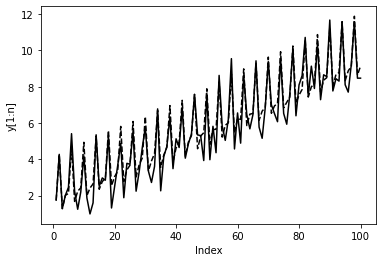

In [3]:
random.seed(1132)
n = 100
s = 4
co = .3
e = [sqrt(.4)]*np.random.randn(n)
sfactor = [10]*np.random.rand(s).reshape((-1,1))
y = []
alpha = []
y.append(sfactor[0] + e[0])
y.append(sfactor[1] + e[1])
y.append(sfactor[2] + e[2])
y.append(sfactor[3] + e[3])
alpha.append(sfactor[0] + e[0])
alpha.append(sfactor[1] + e[1])
alpha.append(sfactor[2] + e[2])
alpha.append(sfactor[3] + e[3])
for t in range(4,n):
    alpha.append(co + alpha[t-s] + .1*e[t])
    y.append(alpha[t-s] + e[t])

y = list(np.array(y).T[0])
alpha = list(np.array(alpha).T[0])

plt.figure()
x = [(i + 1) for i in range(n)]
plt.plot(x, y, color='black')
plt.plot(x, alpha, linestyle='dashed', color='black')
plt.xlabel('Index')
plt.ylabel('y[1:n]')
plt.show()


In [4]:
s = 4
state = np.zeros(n).reshape((-1,1))
v = np.zeros(n).reshape((-1,1))
for i in range(s):
    state[i] = y[i]
def logLikConc(myparam):
    gamma = abs(myparam[0])
    co = abs(myparam[1])
    for t in range(s,n):
        v[t] = y[t]-state[t-s]
        state[t] = co + state[t-s] + gamma*v[t]
    return sum(v[1:n]**2/(n-1))

myresults = opt.fmin(logLikConc,[.2, .2])
print(myresults)

E:\Anaconda3\envs\pcl_deeplearning\lib\site-packages\ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
E:\Anaconda3\envs\pcl_deeplearning\lib\site-packages\ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


Optimization terminated successfully.
         Current function value: 0.395568
         Iterations: 39
         Function evaluations: 75
[0.01516782 0.31092036]


**Forecasting time series**

$$\hat{y}_{t+1}=za_t=z(c+wa_{t-1}+kv_t)$$
$$\hat{y}_{t+2}=z*a_{t+1}=z*(c+w*a_t)=z*c+w*\hat{y}_{t+1}$$
$$\hat{y}_{t+3}=z*a_{t+2}=z*(c+w*a_{t+1})=z*c+w*\hat{y}_{t+2}$$
$$\hat{y}_{t+4}=z*a_{t+3}=z*(c+w*a_{t+2})=z*c+w*\hat{y}_{t+3}$$
$$...$$
$$\hat{y}_{t+h}=z*c+w*\hat{y}_{t+h-1}$$

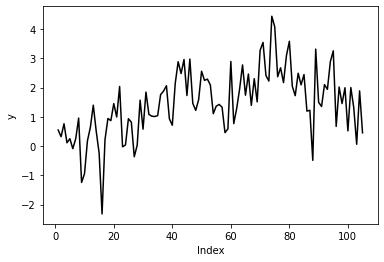

In [5]:
random.seed(1347)
n = 105
co = .06
e = [sqrt(.5)]*np.random.randn(n)
u = [sqrt(.1)]*np.random.randn(n)
y = []
alpha = []
y.append(e[0])
alpha.append(u[0])
for t in range(1,n):
    alpha.append(co + alpha[t-1] + u[t])
    y.append(alpha[t-1]+e[t])

plt.figure()
x = [(i + 1) for i in range(n)]
plt.plot(x, y, color='black')
plt.xlabel('Index')
plt.ylabel('y')
plt.show()

In [6]:
from math import *

obs = 100
x = y[0:obs]
a = np.zeros(obs)
p = np.zeros(obs)
a[0] = x[0]
p[0] = 10000
k = np.zeros(obs)
v = np.zeros(obs)

def funcTheta(parameters):
    q = abs(parameters[0])
    co = abs(parameters[1])
    z = w = 1
    likelihood = sigmae = 0
    for t in range(1,obs):
        k[t] = (z*w*p[t-1])/(z**2*p[t-1]+1)
        p[t] = w**2*p[t-1]-w*z*k[t]*p[t-1]+q
        v[t] = x[t]-z*a[t-1]
        a[t] = co+w*a[t-1]+k[t]*v[t]
        sigmae = sigmae+(v[t]**2/(z**2*p[t-1]+1))
        likelihood = likelihood+.5*log(2*pi)+.5+.5*log(z**2*p[t-1]+1)
    return likelihood+.5*n*log(sigmae/n)

results = opt.fmin(funcTheta,[.6, .2])
print(results)

Optimization terminated successfully.
         Current function value: 130.081379
         Iterations: 44
         Function evaluations: 83
[ 0.0907498  -0.01337567]


E:\Anaconda3\envs\pcl_deeplearning\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
E:\Anaconda3\envs\pcl_deeplearning\lib\site-packages\ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


In [7]:
q = abs(results[0])
co = abs(results[1])
z = w = 1
sigmae = 0
for t in range(1,obs):
    k[t] = (z*w*p[t-1])/(z**2*p[t-1]+1)
    p[t] = w**2*p[t-1]-w*z*k[t]*p[t-1]+q
    v[t] = y[t]-z*a[t-1]
    a[t] = co+w*a[t-1]+k[t]*v[t]
    sigmae = sigmae+(v[t]**2/(z**2*p[t]+1))
#This is the drift parameter
print(co)
#This is the variance of e 
print(sigmae/(obs-1))
#This is the variance of u 
print(q*(sigmae/(obs-1)))

0.013375665655692068
0.5985689836097711
0.05432001851075762


E:\Anaconda3\envs\pcl_deeplearning\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


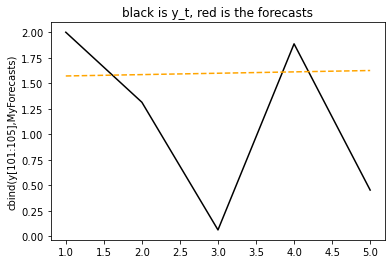

In [8]:
MyForecasts = []
MyForecasts.append(a[obs-1])
MyForecasts.append(co + MyForecasts[0])
MyForecasts.append(co + MyForecasts[1])
MyForecasts.append(co + MyForecasts[2])
MyForecasts.append(co + MyForecasts[3])

plt.figure()
x = [(i + 1) for i in range(5)]
plt.plot(x, y[100:105], color='black')
plt.plot(x, MyForecasts, linestyle='dashed', color='orange')
plt.title("black is y_t, red is the forecasts")
plt.ylabel('cbind(y[101:105],MyForecasts)')
plt.show()

**Forecasting seasonal series**

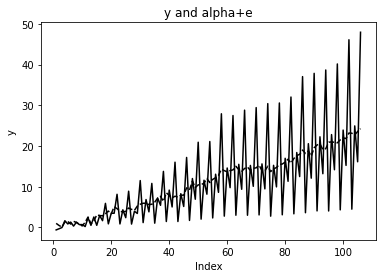

In [9]:
random.seed(115)
n = 106
con = .2
e = [sqrt(.4)]*np.random.randn(n)
u = [sqrt(.1)]*np.random.randn(n)
y = []
alpha = []
factor = [.7, 2, .2, 1.1]
seasonal = np.tile(factor, ceil(n/4))[0:n]
y.append(e[1])
alpha.append(u[1])
for t in range(1,n):
    y.append(seasonal[t]*(alpha[t-1]+e[t]))
    alpha.append(con+alpha[t-1]+u[t])

plt.figure()
x = [(i + 1) for i in range(n)]
plt.plot(x, y, color='black')
plt.plot(x, alpha+e, linestyle='dashed', color='black')
plt.title("y and alpha+e")
plt.ylabel('y')
plt.xlabel('Index')
plt.show()   

In [10]:
import pandas as pd

def seq(a, b):
    c=[]
    for t in b:
        c.append(a[t])
    return c

x = y[0:100]
s = 4
n = len(x)
w = np.tile(1/(2*s),s+1)
w[1:s+1] = 1/s
#This create the centered moving average vector
cma=np.array([nan]*len(y))

for g in range(0, len(y)-s):
    cma[g+int(s/2)] = sum(w*y[g:(g+s+1)])
residuals = y/cma
factors = []
for seas in range(0,s):
    # factors.append(np.mean(residuals[np.arange(seas,len(y)-s+seas+1,s)]))
    m=np.array(seq(residuals,range(seas, len(y)-s+seas+1,s)))
    factors.append(np.mean(m[~pd.isnull(m)]))
newseries = x/np.tile(factors, ceil(n/s))[0:n]

In [11]:
a = np.zeros(len(newseries))
p = np.zeros(len(newseries))
a[0] = newseries[0]
p[0] = 10000
k = np.zeros(len(newseries))
v = np.zeros(len(newseries))

def Theta(parameters):
    q = abs(parameters[0])
    co = abs(parameters[1])
    z = w = 1
    likelihood = sigmae = 0
    for t in range(1,len(newseries)):
        k[t] = (z*w*p[t-1])/(z**2*p[t-1]+1)
        p[t] = w**2*p[t-1]-w*z*k[t]*p[t-1]+q
        v[t] = x[t]-z*a[t-1]
        a[t] = co+w*a[t-1]+k[t]*v[t]
        sigmae = sigmae+(v[t]**2/(z**2*p[t-1]+1))
        likelihood = likelihood+.5*log(2*pi)+.5+.5*log(z**2*p[t-1]+1)
    return likelihood+.5*n*log(sigmae/len(newseries))

results = opt.fmin(Theta,[.6, .2])
print(results)

Optimization terminated successfully.
         Current function value: 354.301392
         Iterations: 63
         Function evaluations: 120
[-6.52896334e-10  2.18393786e-01]


In [12]:
q = abs(results[0])
co = abs(results[1])
z = w = 1
sigmae = 0
for t in range(1,len(newseries)):
    k[t] = (z*w*p[t-1])/(z**2*p[t-1]+1)
    p[t] = w**2*p[t-1]-w*z*k[t]*p[t-1]+q
    v[t] = newseries[t]-z*a[t-1]
    a[t] = co+w*a[t-1]+k[t]*v[t]
    sigmae = sigmae+(v[t]**2/(z**2*p[t]+1))
#This is the drift parameter
print(co)
#This is the variance of e 
print(sigmae/(len(newseries)-1))
#This is the variance of u 
print(q*(sigmae/(len(newseries)-1)))

0.2183937864257236
2.1547558093520935
1.4068321683000919e-09


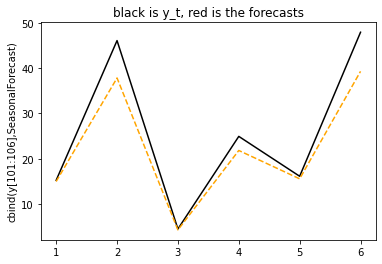

In [13]:
w = z = 1
MyForecasts = []
MyForecasts.append(a[len(x)-1])
MyForecasts.append(co + MyForecasts[0])
MyForecasts.append(co + MyForecasts[1])
MyForecasts.append(co + MyForecasts[2])
MyForecasts.append(co + MyForecasts[3])
MyForecasts.append(co + MyForecasts[4])
SeasonalForecast = MyForecasts*np.tile(factors, 2)[0:6]

plt.figure()
x = [(i + 1) for i in range(6)]
plt.plot(x, y[100:106], color='black')
plt.plot(x, SeasonalForecast, linestyle='dashed', color='orange')
plt.title("black is y_t, red is the forecasts")
plt.ylabel('cbind(y[101:106],SeasonalForecast)')
plt.show()

**Comparing forecasting performance**

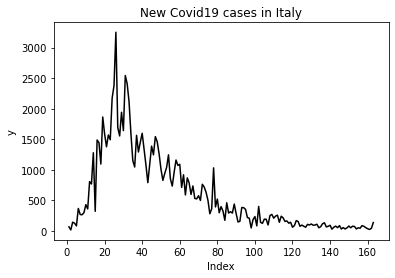

In [14]:
import xlrd

def diff(b):
    c=[]
    for t in range(1,len(b)):
        c.append(b[t]-b[t-1])
    return c

rbook = xlrd.open_workbook('Covid-19.xlsx')
rbook.sheets()
rsheet = rbook.sheet_by_index(0)

num = []
for row in rsheet.get_rows():
    column = row[7]  # 品名所在的列
    value = column.value  # 项目名
    if value != 'Totale casi':  # 排除第一行
        column = row[7]  # 价格所在的列
        value = column.value
        num.append(int(value))
y = diff(num)
plt.figure()
x = [(i + 1) for i in range(len(y))]
plt.plot(x, y, color='black')
plt.title("New Covid19 cases in Italy")
plt.ylabel('y')
plt.xlabel('Index')
plt.show()

In [15]:
obs = len(y) - 5
x = y[0:obs]
a = np.zeros(obs)
p = np.zeros(obs)
a[0] = x[0]
p[0] = 10000
k = np.zeros(obs)
v = np.zeros(obs)

def Theta_2(parameters):
    q = abs(parameters[0])
    co = abs(parameters[1])
    z = w = 1
    likelihood = sigmae = 0
    for t in range(1,obs):
        k[t] = (z*w*p[t-1])/(z**2*p[t-1]+1)
        p[t] = w**2*p[t-1]-w*z*k[t]*p[t-1]+q
        v[t] = x[t]-z*a[t-1]
        a[t] = co+w*a[t-1]+k[t]*v[t]
        sigmae = sigmae+(v[t]**2/(z**2*p[t-1]+1))
        likelihood = likelihood+.5*log(2*pi)+.5+.5*log(z**2*p[t-1]+1)
    return likelihood+.5*n*log(sigmae/len(newseries))

results = opt.fmin(Theta_2,[.6, .2])
print(results)

q = abs(results[0])
co = abs(results[1])
z = w = 1
sigmae = 0
for t in range(1,len(newseries)):
    k[t] = (z*w*p[t-1])/(z**2*p[t-1]+1)
    p[t] = w**2*p[t-1]-w*z*k[t]*p[t-1]+q
    v[t] = x[t]-z*a[t-1]
    a[t] = co+w*a[t-1]+k[t]*v[t]
    sigmae = sigmae+(v[t]**2/(z**2*p[t]+1))
#This is the drift parameter
print(co)
#This is the variance of e 
print(sigmae/(len(newseries)-1))
#This is the variance of u 
print(q*(sigmae/(len(newseries)-1)))

Optimization terminated successfully.
         Current function value: 819.981129
         Iterations: 51
         Function evaluations: 97
[1.48909227e-01 3.51083543e-05]
3.5108354331944147e-05
76309.18820060419
11363.142216908213


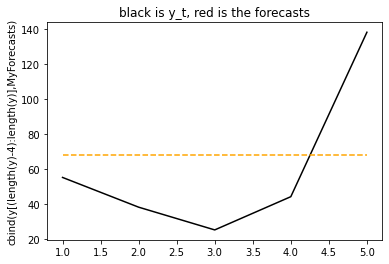

In [16]:
MyForecasts = []
MyForecasts.append(a[obs-1])
MyForecasts.append(co + MyForecasts[0])
MyForecasts.append(co + MyForecasts[1])
MyForecasts.append(co + MyForecasts[2])
MyForecasts.append(co + MyForecasts[3])

plt.figure()
_x = [(i + 1) for i in range(5)]
plt.plot(_x, y[(len(y)-5):len(y)], color='black')
plt.plot(_x, MyForecasts, linestyle='dashed', color='orange')
plt.title("black is y_t, red is the forecasts")
plt.ylabel('cbind(y[(length(y)-4):length(y)],MyForecasts)')
plt.show()

$$MASE=\frac1h\frac{\sum_{t=n+1}^{n+h}|y_t-\hat{y_t}|}{\frac1{n-m}\sum_{t=m+1}^{n}|y_t-y_{t-m}|}$$
$$MAPE=\frac2h\sum_{t=n+1}^{n+h}\frac{|y_t-\hat{y_t}|}{|y_t|+|\hat{y_t}|}×100$$

In [17]:

numerator = list(map(abs,list(np.array(y[(len(y)-5):len(y)])-np.array(MyForecasts))))
denominator = list(map(abs,diff(x)))
MASE = np.mean(np.array(numerator)/np.mean(np.array(denominator)))
denominator = np.array(list(map(abs,MyForecasts))) + np.array(list(map(abs,list(np.array(y[(len(y)-5):len(y)])))))
MAPE = np.mean(200*np.array(numerator)/denominator)

Optimization terminated successfully.
         Current function value: 10645686.640954
         Iterations: 22
         Function evaluations: 44


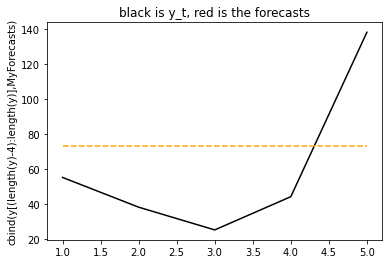

In [18]:
a = np.zeros(obs)
v = np.zeros(obs)
a[0] = x[0]
def logLikConc(myparam):
    gamma = abs(myparam)
    w = z = 1
    co = 0
    for t in range(1,obs):
        v[t] = x[t]-z*a[t-1]
        a[t] = co+w*a[t-1]+gamma*v[t]
    return sum(v[1:obs]**2)

myresults = opt.fmin(logLikConc, .1)
w = z =1
a = np.zeros(obs)
v = np.zeros(obs)
a[0] = x[0]
gamma = myresults
for t in range(1,obs):
    v[t] = x[t]-z*a[t-1]
    a[t] = a[t-1]+gamma*v[t]
LLForecasts = []
#This is my one-step ahead for x:
LLForecasts.append(a[obs-1])
LLForecasts.append(LLForecasts[0])
LLForecasts.append(LLForecasts[1])
LLForecasts.append(LLForecasts[2])
LLForecasts.append(LLForecasts[3])

plt.figure()
_x = [(i + 1) for i in range(5)]
plt.plot(_x, y[(len(y)-5):len(y)], color='black')
plt.plot(_x, LLForecasts, linestyle='dashed', color='orange')
plt.title("black is y_t, red is the forecasts")
plt.ylabel('cbind(y[(length(y)-4):length(y)],MyForecasts)')
plt.show()

In [19]:
numerator = list(map(abs,list(np.array(y[(len(y)-5):len(y)])-np.array(MyForecasts))))
denominator = list(map(abs,diff(x)))
MASETheta = np.mean(np.array(numerator)/np.mean(np.array(denominator)))
numerator = list(map(abs,list(np.array(y[(len(y)-5):len(y)])-np.array(LLForecasts))))
MASELL = np.mean(np.array(numerator)/np.mean(np.array(denominator)))
print(MASETheta)
print(MASELL)

0.21155957384906904
0.22859542152313034


In [20]:
numerator = list(map(abs,list(np.array(y[(len(y)-5):len(y)])-np.array(MyForecasts))))
denominator = np.array(list(map(abs,MyForecasts))) + np.array(list(map(abs,list(np.array(y[(len(y)-5):len(y)])))))
MAPETheta = np.mean(200*np.array(numerator)/denominator)
numerator = list(map(abs,list(np.array(y[(len(y)-5):len(y)])-np.array(LLForecasts))))
denominator = np.array(list(map(abs,LLForecasts))) + np.array(list(map(abs,list(np.array(y[(len(y)-5):len(y)])))))
MAPELL = np.mean(200*np.array(numerator)/denominator)
print(MAPETheta)
print(MAPELL)

56.27440748383697
60.008753368567795


**Forecast competion in action**

In [21]:
def ForecastARkf(y,h):
    n = len(y)
    a = np.zeros(n)
    p = np.zeros(n)
    a[0] = y[0]
    p[0] = 10000
    k = np.zeros(n)
    v = np.zeros(n)
    def fu(mypa):
        q = abs(mypa[0])
        co = mypa[1]
        w = 1-exp(-abs(mypa[2]))
        z = 1
        likelihood = sigmae = 0
        for t in range(1,n):
            k[t] = (z*w*p[t-1])/(z**2*p[t-1]+1)
            p[t] = w**2*p[t-1]-w*z*k[t]*p[t-1]+q
            v[t] = y[t]-z*a[t-1]
            a[t] = co+w*a[t-1]+k[t]*v[t]
            sigmae = sigmae+(v[t]**2/(z**2*p[t-1]+1))
            likelihood = likelihood+.5*log(2*pi)+.5+.5*log(z**2*p[t-1]+1)
        return likelihood+.5*n*log(sigmae/n)
    
    results = opt.fmin(fu,[.2, 1, 2])
    
    z = 1
    q = abs(results[0])
    co = abs(results[1])
    w = 1-exp(-abs(results[2])) 
    sigmae = 0
    for t in range(1,n):
        k[t] = (z*w*p[t-1])/(z**2*p[t-1]+1)
        p[t] = w**2*p[t-1]-w*z*k[t]*p[t-1]+q
        v[t] = y[t]-z*a[t-1]
        a[t] = co+w*a[t-1]+k[t]*v[t]
        sigmae = sigmae+(v[t]**2/(z**2*p[t-1]+1))
    
    Forec = []
    Forec.append(a[len(y)-1])
    for i in range(1,h):
        Forec.append(co+w*Forec[i-1])
    return Forec

In [22]:
def ForecastAR(y,h):
    n = len(y)
    state = np.zeros(n)
    v = np.zeros(n)
    state[0] = y[0]
    def logLikConc(myparam):
        w = 1-exp(-abs(myparam[0]))
        gamma = abs(myparam[1])
        co = abs(myparam[2])
        for t in range(1,n):
            v[t] = y[t]-state[t-1]
            state[t] = co+w*state[t-1]+gamma*v[t]
        return sum(v[1:n]**2)
    
    result = opt.fmin(logLikConc, [2, .2, 1])
    
    w = 1 - exp(-abs(result[0]))
    gamma = abs(result[1])
    co = abs(result[2])
    for t in range(1,n):
        v[t] = y[t]-state[t-1] 
        state[t] = co+w*state[t-1]+gamma*v[t]
   
    Forec = []
    Forec.append(state[len(y)-1])
    for i in range(1,h):
        Forec.append(co+w*Forec[i-1])
    return Forec

In [23]:
def ForecastTheta(y,h):
    n = len(y)
    state = np.zeros(n)
    v = np.zeros(n)
    state[0] = y[0]
    def logLikConc(myparam):
        w = 1
        gamma = abs(myparam[0])
        co = abs(myparam[1])
        for t in range(1,n):
            v[t] = y[t]-state[t-1]
            state[t] = co+w*state[t-1]+gamma*v[t]
        return sum(v[1:n]**2)
    
    result = opt.fmin(logLikConc, [.3, 1])
    
    w = 1
    gamma = abs(result[0])
    co = abs(result[1])
    for t in range(1,n):
        v[t] = y[t]-state[t-1] 
        state[t] = co+w*state[t-1]+gamma*v[t]
   
    Forec = []
    Forec.append(state[len(y)-1])
    for i in range(1,h):
        Forec.append(co+w*Forec[i-1])
    return Forec

In [24]:
def ForecastThetakf(y,h):
    n = len(y)
    a = np.zeros(n)
    p = np.zeros(n)
    a[0] = y[0]
    p[0] = 10000
    k = np.zeros(n)
    v = np.zeros(n)
    def funcTheta(parameters):
        q = abs(parameters[0])
        co = abs(parameters[1])
        z = w = 1
        likelihood = sigmae = 0
        for t in range(1,n):
            k[t] = (z*w*p[t-1])/(z**2*p[t-1]+1)
            p[t] = w**2*p[t-1]-w*z*k[t]*p[t-1]+q
            v[t] = y[t]-z*a[t-1]
            a[t] = co+w*a[t-1]+k[t]*v[t]
            sigmae = sigmae+(v[t]**2/(z**2*p[t-1]+1))
            likelihood = likelihood+.5*log(2*pi)+.5+.5*log(z**2*p[t-1]+1)
        return likelihood+.5*n*log(sigmae/n)
    
    results = opt.fmin(funcTheta,[.3, 1])
    
    q = abs(results[0])
    co = abs(results[1])
    z = w = 1
    for t in range(1,n):
        k[t] = (z*w*p[t-1])/(z**2*p[t-1]+1)
        p[t] = w**2*p[t-1]-w*z*k[t]*p[t-1]+q
        v[t] = y[t]-z*a[t-1]
        a[t] = co+w*a[t-1]+k[t]*v[t]
    
    Forecast = []
    Forecast.append(a[n-1])
    for i in range(1,h):
        Forecast.append(co+Forecast[i-1])
    return Forecast

In [25]:
def ForecastDamped(y, h):
    obs = len(y)
    damped = np.zeros((obs, 2))
    damped[0,0] = y[0] 
    damped[0,1] = 0
    inn = np.zeros(obs)
    def fmsoe(param):
        k1 = abs(param[0])
        k2 = abs(param[1])
        k3 = abs(param[2])
        for t in range(1,obs):
            inn[t] = y[t]-damped[t-1,0]-k3*damped[t-1,1] 
            damped[t,0] = damped[t-1,0]+k3*damped[t-1,1]+k1*inn[t] 
            damped[t,1] = k3*damped[t-1,1]+k2*inn[t]
        return sum(inn[0:obs]**2)/obs
    result = opt.fmin(fmsoe,[random.random(), random.random(), random.random()])
    
    k1=abs(result[0]) 
    k2=abs(result[1]) 
    k3=abs(result[2]) 
    if k3>1: k3=1
    
    for t in range(1,obs):
        inn[t] = y[t]-damped[t-1,0]-k3*damped[t-1,1] 
        damped[t,0] = damped[t-1,0]+k3*damped[t-1,1]+k1*inn[t]#(y[t]-holt[t-1,1]-holt[t-1,2]) 
        damped[t,1] = k3*damped[t-1,1]+k2*inn[t]#(y[t]-holt[t-1,1]-holt[t-1,2])
    Forecast = []
    Forecast.append(damped[obs-1,0]+k3*damped[obs-1,1])
    for i in range(1,h):
        Forecast.append(Forecast[i-1]+damped[obs-1,1]*k3**i)
    return Forecast

In [30]:
data = xlrd.open_workbook('M3C.xls')
Sheet = 'M3Year'
ind = data.sheet_by_name(Sheet)
Rows = ind.nrows
MM = []
for row in range(1, Rows):
    item = []
    for col in range(6, 53):
        val = ind.cell(row, col).value
        if val != '':
            item.append(round(val))
    MM.append(item)

replic = len(MM)
steps = 6
Method1 = np.zeros((replic,steps))
Method2 = np.zeros((replic,steps))
Method3 = np.zeros((replic,steps))
Method4 = np.zeros((replic,steps))
Method5 = np.zeros((replic,steps))
Err1 = np.zeros((replic,steps))
Err2 = np.zeros((replic,steps))
Err3 = np.zeros((replic,steps))
Err4 = np.zeros((replic,steps))
Err5 = np.zeros((replic,steps))
sErr1 = np.zeros((replic,steps))
sErr2 = np.zeros((replic,steps))
sErr3 = np.zeros((replic,steps))
sErr4 = np.zeros((replic,steps))
sErr5 = np.zeros((replic,steps))

for g in range(replic):
    y = MM[g][:-6]
    #For the M4 competition use y<-MM[[g]][[2]] 
    Method1[g,] = ForecastAR(y,steps) 
    Method2[g,] = ForecastARkf(y,steps) 
    Method3[g,] = ForecastTheta(y,steps) 
    Method4[g,] = ForecastThetakf(y,steps) 
    Method5[g,] = ForecastDamped(y,steps)

    Err1[g,] = MM[g][-6:] - Method1[g,]
    Err2[g,] = MM[g][-6:] - Method2[g,]
    Err3[g,] = MM[g][-6:] - Method3[g,]
    Err4[g,] = MM[g][-6:] - Method4[g,]
    Err5[g,] = MM[g][-6:] - Method5[g,]
    
    denominator = np.mean(np.array(list(map(abs,diff(y)))))
    sErr1[g,] = Err1[g,]/denominator
    sErr2[g,] = Err2[g,]/denominator
    sErr3[g,] = Err3[g,]/denominator
    sErr4[g,] = Err4[g,]/denominator
    sErr5[g,] = Err5[g,]/denominator
    
ResultsMAPE = np.zeros((steps, 18))

for s in range(steps):
    sMAPE = np.zeros((replic, 5))
    for i in range(replic):
        numerator = np.array(list(map(abs,list(Err1[i,0:s+1]))))
        denominator = np.array(list(map(abs,Method1[i,][0:s+1]))) + np.array(list(map(abs,MM[i][-6:][0:s+1])))
        sMAPE[i, 0] = np.mean(200*numerator/denominator)
        
        numerator = np.array(list(map(abs,list(Err2[i,0:s+1]))))
        denominator = np.array(list(map(abs,Method2[i,][0:s+1]))) + np.array(list(map(abs,MM[i][-6:][0:s+1])))
        sMAPE[i, 1] = np.mean(200*numerator/denominator)
        
        numerator = np.array(list(map(abs,list(Err3[i,0:s+1]))))
        denominator = np.array(list(map(abs,Method3[i,][0:s+1]))) + np.array(list(map(abs,MM[i][-6:][0:s+1])))
        sMAPE[i, 2] = np.mean(200*numerator/denominator)
        
        numerator = np.array(list(map(abs,list(Err4[i,0:s+1]))))
        denominator = np.array(list(map(abs,Method4[i,][0:s+1]))) + np.array(list(map(abs,MM[i][-6:][0:s+1])))
        sMAPE[i, 3] = np.mean(200*numerator/denominator)
        
        numerator = np.array(list(map(abs,list(Err5[i,0:s+1]))))
        denominator = np.array(list(map(abs,Method5[i,][0:s+1]))) + np.array(list(map(abs,MM[i][-6:][0:s+1])))
        sMAPE[i, 4] = np.mean(200*numerator/denominator)
                    
    ResultsMAPE[s,0] = np.mean(sMAPE[:, 0])    
    ResultsMAPE[s,1] = np.mean(sMAPE[:, 1])
    ResultsMAPE[s,2] = np.mean(sMAPE[:, 2])
    ResultsMAPE[s,3] = np.mean(sMAPE[:, 3])
    ResultsMAPE[s,4] = np.mean(sMAPE[:, 4])
    ResultsMAPE[s,5] = np.mean(sMAPE[:, 0])/np.mean(sMAPE[:, 1])
    ResultsMAPE[s,6] = np.mean(sMAPE[:, 0])/np.mean(sMAPE[:, 2])
    ResultsMAPE[s,7] = np.mean(sMAPE[:, 0])/np.mean(sMAPE[:, 3])
    ResultsMAPE[s,8] = np.mean(sMAPE[:, 0])/np.mean(sMAPE[:, 4])
    ResultsMAPE[s,9] = np.median(sMAPE[:, 0])
    ResultsMAPE[s,10] = np.median(sMAPE[:, 1])
    ResultsMAPE[s,11] = np.median(sMAPE[:, 2])
    ResultsMAPE[s,12] = np.median(sMAPE[:, 3])
    ResultsMAPE[s,13] = np.median(sMAPE[:, 4])
    ResultsMAPE[s,14] = np.median(sMAPE[:, 0])/np.median(sMAPE[:, 1])
    ResultsMAPE[s,15] = np.median(sMAPE[:, 0])/np.median(sMAPE[:, 2])
    ResultsMAPE[s,16] = np.median(sMAPE[:, 0])/np.median(sMAPE[:, 3])
    ResultsMAPE[s,17] = np.median(sMAPE[:, 0])/np.median(sMAPE[:, 4])

ResultsMASE = np.zeros((steps, 18))

for s in range(steps):
    sMASE = np.zeros((replic, 5))
    for i in range(replic):
        sMASE[i,0] = np.mean(np.array(list(map(abs,list(sErr1[i,0:s+1])))))
        sMASE[i,1] = np.mean(np.array(list(map(abs,list(sErr2[i,0:s+1])))))
        sMASE[i,2] = np.mean(np.array(list(map(abs,list(sErr3[i,0:s+1])))))
        sMASE[i,3] = np.mean(np.array(list(map(abs,list(sErr4[i,0:s+1])))))
        sMASE[i,4] = np.mean(np.array(list(map(abs,list(sErr5[i,0:s+1])))))
        
    ResultsMASE[s,0] = np.mean(sMASE[:, 0])    
    ResultsMASE[s,1] = np.mean(sMASE[:, 1])
    ResultsMASE[s,2] = np.mean(sMASE[:, 2])
    ResultsMASE[s,3] = np.mean(sMASE[:, 3])
    ResultsMASE[s,4] = np.mean(sMASE[:, 4])
    ResultsMASE[s,5] = np.mean(sMASE[:, 0])/np.mean(sMASE[:, 1])
    ResultsMASE[s,6] = np.mean(sMASE[:, 0])/np.mean(sMASE[:, 2])
    ResultsMASE[s,7] = np.mean(sMASE[:, 0])/np.mean(sMASE[:, 3])
    ResultsMASE[s,8] = np.mean(sMASE[:, 0])/np.mean(sMASE[:, 4])
    ResultsMASE[s,9] = np.median(sMASE[:, 0])
    ResultsMASE[s,10] = np.median(sMASE[:, 1])
    ResultsMASE[s,11] = np.median(sMASE[:, 2])
    ResultsMASE[s,12] = np.median(sMASE[:, 3])
    ResultsMASE[s,13] = np.median(sMASE[:, 4])
    ResultsMASE[s,14] = np.median(sMASE[:, 0])/np.median(sMASE[:, 1])
    ResultsMASE[s,15] = np.median(sMASE[:, 0])/np.median(sMASE[:, 2])
    ResultsMASE[s,16] = np.median(sMASE[:, 0])/np.median(sMASE[:, 3])
    ResultsMASE[s,17] = np.median(sMASE[:, 0])/np.median(sMASE[:, 4])

Optimization terminated successfully.
         Current function value: 185163.442924
         Iterations: 155
         Function evaluations: 284
Optimization terminated successfully.
         Current function value: 81.797522
         Iterations: 183
         Function evaluations: 349
Optimization terminated successfully.
         Current function value: 185163.442924
         Iterations: 87
         Function evaluations: 171
Optimization terminated successfully.
         Current function value: 81.797522
         Iterations: 113
         Function evaluations: 230
Optimization terminated successfully.
         Current function value: 8078.216597
         Iterations: 100
         Function evaluations: 182
Optimization terminated successfully.
         Current function value: 6394899.137983
         Iterations: 165
         Function evaluations: 299
Optimization terminated successfully.
         Current function value: 103.998479
         Iterations: 189
         Function evaluations: 37

Optimization terminated successfully.
         Current function value: 3437962.870183
         Iterations: 73
         Function evaluations: 139
Optimization terminated successfully.
         Current function value: 100.716652
         Iterations: 134
         Function evaluations: 274
Optimization terminated successfully.
         Current function value: 537625.348342
         Iterations: 167
         Function evaluations: 296
Optimization terminated successfully.
         Current function value: 270074.689266
         Iterations: 165
         Function evaluations: 303
Optimization terminated successfully.
         Current function value: 83.117357
         Iterations: 180
         Function evaluations: 347
Optimization terminated successfully.
         Current function value: 270074.689266
         Iterations: 90
         Function evaluations: 169
Optimization terminated successfully.
         Current function value: 83.117357
         Iterations: 106
         Function evaluations: 2

Optimization terminated successfully.
         Current function value: 2872903.424382
         Iterations: 87
         Function evaluations: 165
Optimization terminated successfully.
         Current function value: 99.956231
         Iterations: 118
         Function evaluations: 235
Optimization terminated successfully.
         Current function value: 126899.392707
         Iterations: 197
         Function evaluations: 358
Optimization terminated successfully.
         Current function value: 1075860.913153
         Iterations: 138
         Function evaluations: 258
Optimization terminated successfully.
         Current function value: 90.441413
         Iterations: 197
         Function evaluations: 384
Optimization terminated successfully.
         Current function value: 1075860.913153
         Iterations: 76
         Function evaluations: 148
Optimization terminated successfully.
         Current function value: 90.441413
         Iterations: 136
         Function evaluations: 

Optimization terminated successfully.
         Current function value: 18726.680080
         Iterations: 135
         Function evaluations: 244
Optimization terminated successfully.
         Current function value: 482886.855521
         Iterations: 150
         Function evaluations: 279
Optimization terminated successfully.
         Current function value: 81.576628
         Iterations: 222
         Function evaluations: 443
Optimization terminated successfully.
         Current function value: 482886.855521
         Iterations: 75
         Function evaluations: 144
Optimization terminated successfully.
         Current function value: 81.576628
         Iterations: 147
         Function evaluations: 309
Optimization terminated successfully.
         Current function value: 6176.011702
         Iterations: 119
         Function evaluations: 211
Optimization terminated successfully.
         Current function value: 89.911472
         Iterations: 209
         Function evaluations: 411
O

Optimization terminated successfully.
         Current function value: 42230.107439
         Iterations: 89
         Function evaluations: 168
Optimization terminated successfully.
         Current function value: 91.401012
         Iterations: 243
         Function evaluations: 484
Optimization terminated successfully.
         Current function value: 91.401012
         Iterations: 157
         Function evaluations: 316
Optimization terminated successfully.
         Current function value: 141937.278337
         Iterations: 129
         Function evaluations: 233
Optimization terminated successfully.
         Current function value: 8080725.698462
         Iterations: 224
         Function evaluations: 412
Optimization terminated successfully.
         Current function value: 108.309069
         Iterations: 164
         Function evaluations: 329
Optimization terminated successfully.
         Current function value: 8080725.698479
         Iterations: 113
         Function evaluations: 

Optimization terminated successfully.
         Current function value: 1015730.604834
         Iterations: 91
         Function evaluations: 174
Optimization terminated successfully.
         Current function value: 94.354416
         Iterations: 114
         Function evaluations: 222
Optimization terminated successfully.
         Current function value: 108067.681749
         Iterations: 138
         Function evaluations: 250
Optimization terminated successfully.
         Current function value: 458160.490253
         Iterations: 208
         Function evaluations: 385
Optimization terminated successfully.
         Current function value: 93.322751
         Iterations: 165
         Function evaluations: 309
Optimization terminated successfully.
         Current function value: 458160.490253
         Iterations: 142
         Function evaluations: 277
Optimization terminated successfully.
         Current function value: 93.322751
         Iterations: 108
         Function evaluations: 2

Optimization terminated successfully.
         Current function value: 101.710860
         Iterations: 156
         Function evaluations: 322
Optimization terminated successfully.
         Current function value: 354149.765694
         Iterations: 257
         Function evaluations: 456
Optimization terminated successfully.
         Current function value: 3723248.282100
         Iterations: 133
         Function evaluations: 242
Optimization terminated successfully.
         Current function value: 100.385590
         Iterations: 195
         Function evaluations: 386
Optimization terminated successfully.
         Current function value: 3723248.282100
         Iterations: 78
         Function evaluations: 147
Optimization terminated successfully.
         Current function value: 100.385590
         Iterations: 125
         Function evaluations: 258
Optimization terminated successfully.
         Current function value: 1493741.323940
         Iterations: 251
         Function evaluatio

Optimization terminated successfully.
         Current function value: 252941.044622
         Iterations: 116
         Function evaluations: 218
Optimization terminated successfully.
         Current function value: 86.098952
         Iterations: 113
         Function evaluations: 225
Optimization terminated successfully.
         Current function value: 36487.946769
         Iterations: 72
         Function evaluations: 131
Optimization terminated successfully.
         Current function value: 512978.148035
         Iterations: 172
         Function evaluations: 313
Optimization terminated successfully.
         Current function value: 82.857566
         Iterations: 196
         Function evaluations: 361
Optimization terminated successfully.
         Current function value: 512978.148035
         Iterations: 93
         Function evaluations: 178
Optimization terminated successfully.
         Current function value: 82.857566
         Iterations: 113
         Function evaluations: 224


Optimization terminated successfully.
         Current function value: 4687669.254422
         Iterations: 152
         Function evaluations: 279
Optimization terminated successfully.
         Current function value: 102.691013
         Iterations: 171
         Function evaluations: 329
Optimization terminated successfully.
         Current function value: 4687669.254422
         Iterations: 85
         Function evaluations: 161
Optimization terminated successfully.
         Current function value: 102.691013
         Iterations: 109
         Function evaluations: 218
Optimization terminated successfully.
         Current function value: 351958.200976
         Iterations: 135
         Function evaluations: 243
Optimization terminated successfully.
         Current function value: 2902598.422870
         Iterations: 140
         Function evaluations: 258
Optimization terminated successfully.
         Current function value: 100.535537
         Iterations: 161
         Function evaluatio

Optimization terminated successfully.
         Current function value: 3723.970471
         Iterations: 80
         Function evaluations: 145
Optimization terminated successfully.
         Current function value: 20110878.460899
         Iterations: 132
         Function evaluations: 243
Optimization terminated successfully.
         Current function value: 111.572569
         Iterations: 196
         Function evaluations: 386
Optimization terminated successfully.
         Current function value: 20110878.460899
         Iterations: 84
         Function evaluations: 158
Optimization terminated successfully.
         Current function value: 111.572569
         Iterations: 143
         Function evaluations: 283
Optimization terminated successfully.
         Current function value: 1614540.201275
         Iterations: 155
         Function evaluations: 275
Optimization terminated successfully.
         Current function value: 5653145.844599
         Iterations: 182
         Function evalua

Optimization terminated successfully.
         Current function value: 109.340612
         Iterations: 215
         Function evaluations: 414
Optimization terminated successfully.
         Current function value: 15224936.298489
         Iterations: 102
         Function evaluations: 195
Optimization terminated successfully.
         Current function value: 109.340612
         Iterations: 136
         Function evaluations: 282
Optimization terminated successfully.
         Current function value: 27987039.286212
         Iterations: 147
         Function evaluations: 270
Optimization terminated successfully.
         Current function value: 115.190550
         Iterations: 180
         Function evaluations: 353
Optimization terminated successfully.
         Current function value: 27987039.286187
         Iterations: 95
         Function evaluations: 179
Optimization terminated successfully.
         Current function value: 115.190550
         Iterations: 124
         Function evaluatio

Optimization terminated successfully.
         Current function value: 83.109255
         Iterations: 178
         Function evaluations: 336
Optimization terminated successfully.
         Current function value: 267979.694454
         Iterations: 139
         Function evaluations: 271
Optimization terminated successfully.
         Current function value: 83.109255
         Iterations: 109
         Function evaluations: 217
Optimization terminated successfully.
         Current function value: 24275.919717
         Iterations: 126
         Function evaluations: 228
Optimization terminated successfully.
         Current function value: 5880478.178462
         Iterations: 161
         Function evaluations: 291
Optimization terminated successfully.
         Current function value: 101.998058
         Iterations: 206
         Function evaluations: 404
Optimization terminated successfully.
         Current function value: 5880478.178471
         Iterations: 115
         Function evaluations:

Optimization terminated successfully.
         Current function value: 286.023147
         Iterations: 144
         Function evaluations: 299
Optimization terminated successfully.
         Current function value: 332405.831670
         Iterations: 181
         Function evaluations: 321
Optimization terminated successfully.
         Current function value: 19871552.070007
         Iterations: 254
         Function evaluations: 456
Optimization terminated successfully.
         Current function value: 289.604009
         Iterations: 185
         Function evaluations: 364
Optimization terminated successfully.
         Current function value: 22331388.677497
         Iterations: 86
         Function evaluations: 163
Optimization terminated successfully.
         Current function value: 289.604009
         Iterations: 134
         Function evaluations: 281
Optimization terminated successfully.
         Current function value: 605209.588498
         Iterations: 58
         Function evaluatio

Optimization terminated successfully.
         Current function value: 13255746.467902
         Iterations: 79
         Function evaluations: 147
Optimization terminated successfully.
         Current function value: 323310.889482
         Iterations: 86
         Function evaluations: 167
Optimization terminated successfully.
         Current function value: 2008589.037264
         Iterations: 156
         Function evaluations: 294
Optimization terminated successfully.
         Current function value: 274.720964
         Iterations: 180
         Function evaluations: 347
Optimization terminated successfully.
         Current function value: 2008589.037264
         Iterations: 75
         Function evaluations: 146
Optimization terminated successfully.
         Current function value: 274.720964
         Iterations: 114
         Function evaluations: 229
Optimization terminated successfully.
         Current function value: 44974.448354
         Iterations: 74
         Function evaluatio

Optimization terminated successfully.
         Current function value: 92632379.379855
         Iterations: 77
         Function evaluations: 148
Optimization terminated successfully.
         Current function value: 327.272949
         Iterations: 65
         Function evaluations: 128
Optimization terminated successfully.
         Current function value: 2506224.164983
         Iterations: 107
         Function evaluations: 194
Optimization terminated successfully.
         Current function value: 5527630.225958
         Iterations: 109
         Function evaluations: 196
Optimization terminated successfully.
         Current function value: 293.109313
         Iterations: 181
         Function evaluations: 353
Optimization terminated successfully.
         Current function value: 5527630.225958
         Iterations: 79
         Function evaluations: 149
Optimization terminated successfully.
         Current function value: 293.109313
         Iterations: 125
         Function evaluatio

Optimization terminated successfully.
         Current function value: 216405.993734
         Iterations: 183
         Function evaluations: 317
Optimization terminated successfully.
         Current function value: 1093009.693434
         Iterations: 112
         Function evaluations: 209
Optimization terminated successfully.
         Current function value: 178.412710
         Iterations: 187
         Function evaluations: 365
Optimization terminated successfully.
         Current function value: 1093009.693434
         Iterations: 83
         Function evaluations: 155
Optimization terminated successfully.
         Current function value: 178.412710
         Iterations: 118
         Function evaluations: 231
Optimization terminated successfully.
         Current function value: 19650.742143
         Iterations: 116
         Function evaluations: 204
Optimization terminated successfully.
         Current function value: 4911264.168914
         Iterations: 166
         Function evaluat

Optimization terminated successfully.
         Current function value: 13793779.136999
         Iterations: 134
         Function evaluations: 252
Optimization terminated successfully.
         Current function value: 291.702645
         Iterations: 171
         Function evaluations: 348
Optimization terminated successfully.
         Current function value: 13793779.136999
         Iterations: 94
         Function evaluations: 181
Optimization terminated successfully.
         Current function value: 291.702645
         Iterations: 115
         Function evaluations: 230
Optimization terminated successfully.
         Current function value: 380939.594887
         Iterations: 80
         Function evaluations: 155
Optimization terminated successfully.
         Current function value: 15612019.058519
         Iterations: 110
         Function evaluations: 200
Optimization terminated successfully.
         Current function value: 288.413589
         Iterations: 250
         Function evaluat

Optimization terminated successfully.
         Current function value: 296.900603
         Iterations: 202
         Function evaluations: 395
Optimization terminated successfully.
         Current function value: 5833879.669061
         Iterations: 75
         Function evaluations: 138
Optimization terminated successfully.
         Current function value: 297.053238
         Iterations: 174
         Function evaluations: 339
Optimization terminated successfully.
         Current function value: 122842.575622
         Iterations: 67
         Function evaluations: 120
Optimization terminated successfully.
         Current function value: 17803765.688606
         Iterations: 148
         Function evaluations: 278
Optimization terminated successfully.
         Current function value: 311.725645
         Iterations: 241
         Function evaluations: 481
Optimization terminated successfully.
         Current function value: 17803765.688606
         Iterations: 76
         Function evaluatio

Optimization terminated successfully.
         Current function value: 2111189.188672
         Iterations: 79
         Function evaluations: 152
Optimization terminated successfully.
         Current function value: 252.562761
         Iterations: 140
         Function evaluations: 283
Optimization terminated successfully.
         Current function value: 61223.899978
         Iterations: 284
         Function evaluations: 498
Optimization terminated successfully.
         Current function value: 3557519.399340
         Iterations: 132
         Function evaluations: 244
Optimization terminated successfully.
         Current function value: 265.893066
         Iterations: 190
         Function evaluations: 372
Optimization terminated successfully.
         Current function value: 3557519.399340
         Iterations: 78
         Function evaluations: 147
Optimization terminated successfully.
         Current function value: 265.893066
         Iterations: 106
         Function evaluations

Optimization terminated successfully.
         Current function value: 288.570937
         Iterations: 209
         Function evaluations: 375
Optimization terminated successfully.
         Current function value: 8122395.664073
         Iterations: 64
         Function evaluations: 126
Optimization terminated successfully.
         Current function value: 290.036556
         Iterations: 64
         Function evaluations: 122
Optimization terminated successfully.
         Current function value: 222427.543814
         Iterations: 90
         Function evaluations: 170
Optimization terminated successfully.
         Current function value: 39378840.121997
         Iterations: 107
         Function evaluations: 201
Optimization terminated successfully.
         Current function value: 317.056027
         Iterations: 230
         Function evaluations: 419
Optimization terminated successfully.
         Current function value: 39378840.121997
         Iterations: 67
         Function evaluation

Optimization terminated successfully.
         Current function value: 67636.192730
         Iterations: 76
         Function evaluations: 148
Optimization terminated successfully.
         Current function value: 87.382822
         Iterations: 101
         Function evaluations: 194
Optimization terminated successfully.
         Current function value: 5035.195372
         Iterations: 71
         Function evaluations: 131
Optimization terminated successfully.
         Current function value: 98593.492767
         Iterations: 120
         Function evaluations: 224
Optimization terminated successfully.
         Current function value: 98593.492767
         Iterations: 96
         Function evaluations: 186
Optimization terminated successfully.
         Current function value: 92.562199
         Iterations: 112
         Function evaluations: 218
Optimization terminated successfully.
         Current function value: 6201.059036
         Iterations: 98
         Function evaluations: 175
Opti

Optimization terminated successfully.
         Current function value: 95.062656
         Iterations: 172
         Function evaluations: 328
Optimization terminated successfully.
         Current function value: 156430.276540
         Iterations: 72
         Function evaluations: 141
Optimization terminated successfully.
         Current function value: 95.062656
         Iterations: 103
         Function evaluations: 203
Optimization terminated successfully.
         Current function value: 11189.056168
         Iterations: 66
         Function evaluations: 119
Optimization terminated successfully.
         Current function value: 128080.307383
         Iterations: 202
         Function evaluations: 367
Optimization terminated successfully.
         Current function value: 94.898199
         Iterations: 169
         Function evaluations: 309
Optimization terminated successfully.
         Current function value: 131740.644546
         Iterations: 85
         Function evaluations: 164
O

Optimization terminated successfully.
         Current function value: 78878.147737
         Iterations: 76
         Function evaluations: 146
Optimization terminated successfully.
         Current function value: 91.852808
         Iterations: 117
         Function evaluations: 232
Optimization terminated successfully.
         Current function value: 5232.126315
         Iterations: 73
         Function evaluations: 134
Optimization terminated successfully.
         Current function value: 100382.371441
         Iterations: 254
         Function evaluations: 474
Optimization terminated successfully.
         Current function value: 91.820888
         Iterations: 172
         Function evaluations: 330
Optimization terminated successfully.
         Current function value: 100382.371441
         Iterations: 93
         Function evaluations: 173
Optimization terminated successfully.
         Current function value: 91.820888
         Iterations: 113
         Function evaluations: 230
Opt

Optimization terminated successfully.
         Current function value: 90250.503713
         Iterations: 73
         Function evaluations: 141
Optimization terminated successfully.
         Current function value: 91.347395
         Iterations: 119
         Function evaluations: 231
Optimization terminated successfully.
         Current function value: 6623.079759
         Iterations: 99
         Function evaluations: 181
Optimization terminated successfully.
         Current function value: 68580.402576
         Iterations: 106
         Function evaluations: 202
Optimization terminated successfully.
         Current function value: 93.624611
         Iterations: 186
         Function evaluations: 356
Optimization terminated successfully.
         Current function value: 68580.402576
         Iterations: 74
         Function evaluations: 141
Optimization terminated successfully.
         Current function value: 93.624611
         Iterations: 120
         Function evaluations: 239
Optim

Optimization terminated successfully.
         Current function value: 113.600606
         Iterations: 171
         Function evaluations: 321
Optimization terminated successfully.
         Current function value: 766789.044921
         Iterations: 77
         Function evaluations: 145
Optimization terminated successfully.
         Current function value: 113.600606
         Iterations: 108
         Function evaluations: 217
Optimization terminated successfully.
         Current function value: 45273.957508
         Iterations: 49
         Function evaluations: 95
Optimization terminated successfully.
         Current function value: 605683.478532
         Iterations: 104
         Function evaluations: 189
Optimization terminated successfully.
         Current function value: 106.046831
         Iterations: 170
         Function evaluations: 336
Optimization terminated successfully.
         Current function value: 605683.478532
         Iterations: 78
         Function evaluations: 148

Optimization terminated successfully.
         Current function value: 485602.390060
         Iterations: 82
         Function evaluations: 157
Optimization terminated successfully.
         Current function value: 104.856050
         Iterations: 128
         Function evaluations: 248
Optimization terminated successfully.
         Current function value: 32116.827953
         Iterations: 229
         Function evaluations: 404
Optimization terminated successfully.
         Current function value: 307889.073827
         Iterations: 119
         Function evaluations: 227
Optimization terminated successfully.
         Current function value: 103.163186
         Iterations: 190
         Function evaluations: 363
Optimization terminated successfully.
         Current function value: 307889.073949
         Iterations: 116
         Function evaluations: 222
Optimization terminated successfully.
         Current function value: 103.163186
         Iterations: 120
         Function evaluations: 

Optimization terminated successfully.
         Current function value: 108.392676
         Iterations: 175
         Function evaluations: 339
Optimization terminated successfully.
         Current function value: 742706.565986
         Iterations: 78
         Function evaluations: 151
Optimization terminated successfully.
         Current function value: 108.392676
         Iterations: 115
         Function evaluations: 231
Optimization terminated successfully.
         Current function value: 45329.849671
         Iterations: 239
         Function evaluations: 427
Optimization terminated successfully.
         Current function value: 819223.212798
         Iterations: 158
         Function evaluations: 295
Optimization terminated successfully.
         Current function value: 109.549215
         Iterations: 180
         Function evaluations: 345
Optimization terminated successfully.
         Current function value: 819223.212798
         Iterations: 83
         Function evaluations: 1

Optimization terminated successfully.
         Current function value: 325.004722
         Iterations: 133
         Function evaluations: 267
Optimization terminated successfully.
         Current function value: 604666.593545
         Iterations: 65
         Function evaluations: 123
Optimization terminated successfully.
         Current function value: 43604281.819161
         Iterations: 154
         Function evaluations: 289
Optimization terminated successfully.
         Current function value: 337.917531
         Iterations: 186
         Function evaluations: 363
Optimization terminated successfully.
         Current function value: 43604281.819161
         Iterations: 83
         Function evaluations: 157
Optimization terminated successfully.
         Current function value: 337.917531
         Iterations: 114
         Function evaluations: 238
Optimization terminated successfully.
         Current function value: 1067675.646457
         Iterations: 99
         Function evaluatio

Optimization terminated successfully.
         Current function value: 198.781737
         Iterations: 227
         Function evaluations: 433
Optimization terminated successfully.
         Current function value: 16081277.642568
         Iterations: 64
         Function evaluations: 126
Optimization terminated successfully.
         Current function value: 198.781737
         Iterations: 167
         Function evaluations: 346
Optimization terminated successfully.
         Current function value: 618547.475359
         Iterations: 87
         Function evaluations: 153
Optimization terminated successfully.
         Current function value: 218.656175
         Iterations: 233
         Function evaluations: 447
Optimization terminated successfully.
         Current function value: 69884796.276978
         Iterations: 65
         Function evaluations: 123
Optimization terminated successfully.
         Current function value: 218.765605
         Iterations: 192
         Function evaluations: 

Optimization terminated successfully.
         Current function value: 8102198.835804
         Iterations: 81
         Function evaluations: 154
Optimization terminated successfully.
         Current function value: 303.406035
         Iterations: 131
         Function evaluations: 268
Optimization terminated successfully.
         Current function value: 201331.224313
         Iterations: 88
         Function evaluations: 176
Optimization terminated successfully.
         Current function value: 2179039.696977
         Iterations: 221
         Function evaluations: 407
Optimization terminated successfully.
         Current function value: 246.690379
         Iterations: 193
         Function evaluations: 380
Optimization terminated successfully.
         Current function value: 2179039.696977
         Iterations: 88
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 246.690379
         Iterations: 125
         Function evaluations

Optimization terminated successfully.
         Current function value: 2267693.731732
         Iterations: 61
         Function evaluations: 124
Optimization terminated successfully.
         Current function value: 65164854.050854
         Iterations: 139
         Function evaluations: 255
Optimization terminated successfully.
         Current function value: 204.391560
         Iterations: 183
         Function evaluations: 354
Optimization terminated successfully.
         Current function value: 65164854.050854
         Iterations: 95
         Function evaluations: 182
Optimization terminated successfully.
         Current function value: 204.391560
         Iterations: 123
         Function evaluations: 248
Optimization terminated successfully.
         Current function value: 2741157.805674
         Iterations: 74
         Function evaluations: 133
Optimization terminated successfully.
         Current function value: 16119553.991599
         Iterations: 196
         Function eva

Optimization terminated successfully.
         Current function value: 130.730332
         Iterations: 234
         Function evaluations: 429
Optimization terminated successfully.
         Current function value: 1443.064277
         Iterations: 67
         Function evaluations: 126
Optimization terminated successfully.
         Current function value: 130.730332
         Iterations: 107
         Function evaluations: 211
Optimization terminated successfully.
         Current function value: 13.991076
         Iterations: 70
         Function evaluations: 128
Optimization terminated successfully.
         Current function value: 1448.875844
         Iterations: 120
         Function evaluations: 224
Optimization terminated successfully.
         Current function value: 134.095557
         Iterations: 218
         Function evaluations: 400
Optimization terminated successfully.
         Current function value: 1448.875844
         Iterations: 81
         Function evaluations: 154
Optimiz

Optimization terminated successfully.
         Current function value: 338.599904
         Iterations: 132
         Function evaluations: 253
Optimization terminated successfully.
         Current function value: 1801378.393973
         Iterations: 78
         Function evaluations: 147
Optimization terminated successfully.
         Current function value: 203117785.509208
         Iterations: 269
         Function evaluations: 473
Optimization terminated successfully.
         Current function value: 364.742557
         Iterations: 158
         Function evaluations: 318
Optimization terminated successfully.
         Current function value: 234269792.587806
         Iterations: 67
         Function evaluations: 129
Optimization terminated successfully.
         Current function value: 364.753255
         Iterations: 128
         Function evaluations: 255
Optimization terminated successfully.
         Current function value: 5869996.411428
         Iterations: 80
         Function evalua

Optimization terminated successfully.
         Current function value: 257.018782
         Iterations: 178
         Function evaluations: 348
Optimization terminated successfully.
         Current function value: 27792.756125
         Iterations: 118
         Function evaluations: 222
Optimization terminated successfully.
         Current function value: 239.234415
         Iterations: 210
         Function evaluations: 418
Optimization terminated successfully.
         Current function value: 468415.298472
         Iterations: 58
         Function evaluations: 111
Optimization terminated successfully.
         Current function value: 239.234415
         Iterations: 143
         Function evaluations: 291
Optimization terminated successfully.
         Current function value: 11439.609725
         Iterations: 246
         Function evaluations: 439
Optimization terminated successfully.
         Current function value: 591281.016009
         Iterations: 207
         Function evaluations: 3

Optimization terminated successfully.
         Current function value: 6718.424875
         Iterations: 74
         Function evaluations: 136
Optimization terminated successfully.
         Current function value: 990553.985676
         Iterations: 90
         Function evaluations: 169
Optimization terminated successfully.
         Current function value: 256.215697
         Iterations: 231
         Function evaluations: 443
Optimization terminated successfully.
         Current function value: 990553.985676
         Iterations: 64
         Function evaluations: 122
Optimization terminated successfully.
         Current function value: 256.215697
         Iterations: 128
         Function evaluations: 261
Optimization terminated successfully.
         Current function value: 25423.093622
         Iterations: 75
         Function evaluations: 137
Optimization terminated successfully.
         Current function value: 714092.320583
         Iterations: 144
         Function evaluations: 27

Optimization terminated successfully.
         Current function value: 10750.511629
         Iterations: 85
         Function evaluations: 165
Optimization terminated successfully.
         Current function value: 67.616683
         Iterations: 111
         Function evaluations: 221
Optimization terminated successfully.
         Current function value: 1496.366846
         Iterations: 145
         Function evaluations: 251
Optimization terminated successfully.
         Current function value: 504376.557383
         Iterations: 130
         Function evaluations: 236
Optimization terminated successfully.
         Current function value: 94.133021
         Iterations: 194
         Function evaluations: 381
Optimization terminated successfully.
         Current function value: 504376.557383
         Iterations: 86
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 94.133021
         Iterations: 117
         Function evaluations: 233
Op

Optimization terminated successfully.
         Current function value: 11083.647948
         Iterations: 188
         Function evaluations: 326
Optimization terminated successfully.
         Current function value: 580756.020583
         Iterations: 108
         Function evaluations: 200
Optimization terminated successfully.
         Current function value: 95.144085
         Iterations: 184
         Function evaluations: 366
Optimization terminated successfully.
         Current function value: 580756.020583
         Iterations: 75
         Function evaluations: 142
Optimization terminated successfully.
         Current function value: 95.144085
         Iterations: 124
         Function evaluations: 246
Optimization terminated successfully.
         Current function value: 39359.528080
         Iterations: 322
         Function evaluations: 562
Optimization terminated successfully.
         Current function value: 650460.950521
         Iterations: 106
         Function evaluations: 

Optimization terminated successfully.
         Current function value: 94.397505
         Iterations: 137
         Function evaluations: 275
Optimization terminated successfully.
         Current function value: 61902.887018
         Iterations: 68
         Function evaluations: 126
Optimization terminated successfully.
         Current function value: 216663.380469
         Iterations: 114
         Function evaluations: 207
Optimization terminated successfully.
         Current function value: 87.093254
         Iterations: 189
         Function evaluations: 365
Optimization terminated successfully.
         Current function value: 216663.380469
         Iterations: 82
         Function evaluations: 152
Optimization terminated successfully.
         Current function value: 87.093254
         Iterations: 110
         Function evaluations: 220
Optimization terminated successfully.
         Current function value: 21363.290239
         Iterations: 47
         Function evaluations: 88
Opt

Optimization terminated successfully.
         Current function value: 134.860137
         Iterations: 76
         Function evaluations: 139
Optimization terminated successfully.
         Current function value: 5229.707651
         Iterations: 102
         Function evaluations: 183
Optimization terminated successfully.
         Current function value: 82.351821
         Iterations: 192
         Function evaluations: 351
Optimization terminated successfully.
         Current function value: 6147.637527
         Iterations: 64
         Function evaluations: 123
Optimization terminated successfully.
         Current function value: 83.399161
         Iterations: 171
         Function evaluations: 320
Optimization terminated successfully.
         Current function value: 171.192235
         Iterations: 169
         Function evaluations: 306
Optimization terminated successfully.
         Current function value: 15142.312882
         Iterations: 203
         Function evaluations: 358
Optimi

Optimization terminated successfully.
         Current function value: 317249.393417
         Iterations: 93
         Function evaluations: 172
Optimization terminated successfully.
         Current function value: 114.226429
         Iterations: 119
         Function evaluations: 239
Optimization terminated successfully.
         Current function value: 17998.233612
         Iterations: 57
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 231101.149168
         Iterations: 194
         Function evaluations: 362
Optimization terminated successfully.
         Current function value: 108.819077
         Iterations: 209
         Function evaluations: 416
Optimization terminated successfully.
         Current function value: 231101.149168
         Iterations: 97
         Function evaluations: 185
Optimization terminated successfully.
         Current function value: 108.819077
         Iterations: 137
         Function evaluations: 27

Optimization terminated successfully.
         Current function value: 110.214057
         Iterations: 102
         Function evaluations: 200
Optimization terminated successfully.
         Current function value: 36360.916498
         Iterations: 82
         Function evaluations: 147
Optimization terminated successfully.
         Current function value: 20360140.986515
         Iterations: 275
         Function evaluations: 498
Optimization terminated successfully.
         Current function value: 153.833807
         Iterations: 208
         Function evaluations: 415
Optimization terminated successfully.
         Current function value: 21825217.452170
         Iterations: 82
         Function evaluations: 154
Optimization terminated successfully.
         Current function value: 153.980305
         Iterations: 150
         Function evaluations: 295
Optimization terminated successfully.
         Current function value: 1148695.655383
         Iterations: 112
         Function evaluatio

Optimization terminated successfully.
         Current function value: 117.808390
         Iterations: 181
         Function evaluations: 351
Optimization terminated successfully.
         Current function value: 427782.115484
         Iterations: 104
         Function evaluations: 199
Optimization terminated successfully.
         Current function value: 117.808390
         Iterations: 133
         Function evaluations: 264
Optimization terminated successfully.
         Current function value: 41018.293252
         Iterations: 144
         Function evaluations: 262
Optimization terminated successfully.
         Current function value: 544102.926955
         Iterations: 95
         Function evaluations: 177
Optimization terminated successfully.
         Current function value: 115.215737
         Iterations: 199
         Function evaluations: 394
Optimization terminated successfully.
         Current function value: 544102.926955
         Iterations: 67
         Function evaluations: 1

Optimization terminated successfully.
         Current function value: 564273.174772
         Iterations: 112
         Function evaluations: 192
Optimization terminated successfully.
         Current function value: 406720.484409
         Iterations: 303
         Function evaluations: 541
Optimization terminated successfully.
         Current function value: 92.681400
         Iterations: 239
         Function evaluations: 463
Optimization terminated successfully.
         Current function value: 522016.982223
         Iterations: 57
         Function evaluations: 108
Optimization terminated successfully.
         Current function value: 93.690674
         Iterations: 140
         Function evaluations: 263
Optimization terminated successfully.
         Current function value: 30294.012828
         Iterations: 165
         Function evaluations: 297
Optimization terminated successfully.
         Current function value: 1249798.999152
         Iterations: 323
         Function evaluations

Optimization terminated successfully.
         Current function value: 75.468014
         Iterations: 194
         Function evaluations: 376
Optimization terminated successfully.
         Current function value: 5873.199650
         Iterations: 66
         Function evaluations: 124
Optimization terminated successfully.
         Current function value: 77.386857
         Iterations: 155
         Function evaluations: 298
Optimization terminated successfully.
         Current function value: 301.292306
         Iterations: 98
         Function evaluations: 173
Optimization terminated successfully.
         Current function value: 17023.376810
         Iterations: 92
         Function evaluations: 176
Optimization terminated successfully.
         Current function value: 90.013550
         Iterations: 192
         Function evaluations: 358
Optimization terminated successfully.
         Current function value: 17023.376818
         Iterations: 63
         Function evaluations: 121
Optimiza

Optimization terminated successfully.
         Current function value: 372384.442165
         Iterations: 115
         Function evaluations: 208
Optimization terminated successfully.
         Current function value: 114.509110
         Iterations: 153
         Function evaluations: 292
Optimization terminated successfully.
         Current function value: 372384.442165
         Iterations: 72
         Function evaluations: 134
Optimization terminated successfully.
         Current function value: 114.509110
         Iterations: 105
         Function evaluations: 204
Optimization terminated successfully.
         Current function value: 15953.464363
         Iterations: 129
         Function evaluations: 223
Optimization terminated successfully.
         Current function value: 2032271.615199
         Iterations: 138
         Function evaluations: 261
Optimization terminated successfully.
         Current function value: 130.822177
         Iterations: 178
         Function evaluations:

Optimization terminated successfully.
         Current function value: 119.360226
         Iterations: 173
         Function evaluations: 310
Optimization terminated successfully.
         Current function value: 672296.812078
         Iterations: 74
         Function evaluations: 137
Optimization terminated successfully.
         Current function value: 120.707357
         Iterations: 137
         Function evaluations: 258
Optimization terminated successfully.
         Current function value: 32924.366391
         Iterations: 157
         Function evaluations: 275
Optimization terminated successfully.
         Current function value: 138.341637
         Iterations: 230
         Function evaluations: 423
Optimization terminated successfully.
         Current function value: 5378568.776410
         Iterations: 72
         Function evaluations: 138
Optimization terminated successfully.
         Current function value: 139.759541
         Iterations: 161
         Function evaluations: 307

Optimization terminated successfully.
         Current function value: 289757.617756
         Iterations: 106
         Function evaluations: 193
Optimization terminated successfully.
         Current function value: 909392.765217
         Iterations: 181
         Function evaluations: 344
Optimization terminated successfully.
         Current function value: 130.045324
         Iterations: 317
         Function evaluations: 577
Optimization terminated successfully.
         Current function value: 960714.194810
         Iterations: 86
         Function evaluations: 164
Optimization terminated successfully.
         Current function value: 130.366948
         Iterations: 133
         Function evaluations: 258
Optimization terminated successfully.
         Current function value: 50531.429982
         Iterations: 130
         Function evaluations: 242
Optimization terminated successfully.
         Current function value: 527521.884211
         Iterations: 182
         Function evaluation

Optimization terminated successfully.
         Current function value: 139.898090
         Iterations: 151
         Function evaluations: 292
Optimization terminated successfully.
         Current function value: 215833.925858
         Iterations: 149
         Function evaluations: 273
Optimization terminated successfully.
         Current function value: 814886.647492
         Iterations: 167
         Function evaluations: 307
Optimization terminated successfully.
         Current function value: 122.522826
         Iterations: 159
         Function evaluations: 309
Optimization terminated successfully.
         Current function value: 814886.647496
         Iterations: 80
         Function evaluations: 149
Optimization terminated successfully.
         Current function value: 122.522826
         Iterations: 108
         Function evaluations: 214
Optimization terminated successfully.
         Current function value: 41518.885089
         Iterations: 123
         Function evaluations: 

Optimization terminated successfully.
         Current function value: 119.261668
         Iterations: 171
         Function evaluations: 321
Optimization terminated successfully.
         Current function value: 587926.597893
         Iterations: 79
         Function evaluations: 153
Optimization terminated successfully.
         Current function value: 119.261668
         Iterations: 103
         Function evaluations: 206
Optimization terminated successfully.
         Current function value: 36507.228483
         Iterations: 201
         Function evaluations: 354
Optimization terminated successfully.
         Current function value: 3707036.639245
         Iterations: 177
         Function evaluations: 312
Optimization terminated successfully.
         Current function value: 136.085837
         Iterations: 182
         Function evaluations: 357
Optimization terminated successfully.
         Current function value: 3707036.639245
         Iterations: 84
         Function evaluations:

Optimization terminated successfully.
         Current function value: 116.040989
         Iterations: 188
         Function evaluations: 362
Optimization terminated successfully.
         Current function value: 421654.890685
         Iterations: 89
         Function evaluations: 169
Optimization terminated successfully.
         Current function value: 116.040989
         Iterations: 104
         Function evaluations: 211
Optimization terminated successfully.
         Current function value: 20340.744002
         Iterations: 199
         Function evaluations: 356
Optimization terminated successfully.
         Current function value: 1025265.538262
         Iterations: 109
         Function evaluations: 202
Optimization terminated successfully.
         Current function value: 127.723662
         Iterations: 168
         Function evaluations: 318
Optimization terminated successfully.
         Current function value: 1025265.538262
         Iterations: 74
         Function evaluations:

Optimization terminated successfully.
         Current function value: 106.483525
         Iterations: 212
         Function evaluations: 420
Optimization terminated successfully.
         Current function value: 843347.433658
         Iterations: 84
         Function evaluations: 160
Optimization terminated successfully.
         Current function value: 106.483525
         Iterations: 134
         Function evaluations: 278
Optimization terminated successfully.
         Current function value: 70584.427223
         Iterations: 111
         Function evaluations: 202
Optimization terminated successfully.
         Current function value: 1084732.855833
         Iterations: 131
         Function evaluations: 240
Optimization terminated successfully.
         Current function value: 107.257553
         Iterations: 215
         Function evaluations: 418
Optimization terminated successfully.
         Current function value: 1084732.855833
         Iterations: 84
         Function evaluations:

Optimization terminated successfully.
         Current function value: 179987068.607296
         Iterations: 119
         Function evaluations: 229
Optimization terminated successfully.
         Current function value: 285.499609
         Iterations: 100
         Function evaluations: 186
Optimization terminated successfully.
         Current function value: 5815700.378593
         Iterations: 153
         Function evaluations: 275
Optimization terminated successfully.
         Current function value: 280.480379
         Iterations: 160
         Function evaluations: 301
Optimization terminated successfully.
         Current function value: 143898654.145946
         Iterations: 71
         Function evaluations: 133
Optimization terminated successfully.
         Current function value: 280.480379
         Iterations: 109
         Function evaluations: 210
Optimization terminated successfully.
         Current function value: 4636807.678978
         Iterations: 180
         Function eval

In [31]:
print(np.around(ResultsMAPE,3))
print(np.around(ResultsMASE,3))

[[ 8.24   7.655  8.215  7.603  8.744  1.076  1.003  1.084  0.942  3.897
   3.775  4.026  3.775  4.241  1.032  0.968  1.032  0.919]
 [10.027  9.644 10.017  9.546 11.465  1.04   1.001  1.05   0.875  5.64
   5.419  5.676  5.355  6.317  1.041  0.994  1.053  0.893]
 [12.081 11.728 12.033 11.646 13.819  1.03   1.004  1.037  0.874  7.357
   7.129  7.459  7.059  7.875  1.032  0.986  1.042  0.934]
 [13.671 13.384 13.592 13.252 15.598  1.021  1.006  1.032  0.876  8.782
   8.721  9.235  8.639  9.579  1.007  0.951  1.017  0.917]
 [15.147 14.899 14.964 14.727 17.205  1.017  1.012  1.029  0.88  10.287
   9.988 10.215  9.804 11.304  1.03   1.007  1.049  0.91 ]
 [16.301 16.138 16.156 15.963 18.48   1.01   1.009  1.021  0.882 11.206
  11.319 11.448 11.061 12.443  0.99   0.979  1.013  0.901]]
[[1.101 1.066 1.094 1.038 1.143 1.033 1.006 1.061 0.964 0.745 0.738 0.745
  0.704 0.761 1.01  1.    1.058 0.979]
 [1.409 1.398 1.403 1.359 1.559 1.008 1.004 1.037 0.904 0.958 0.971 0.958
  0.935 1.017 0.987 1.    1

In [35]:
print(np.around(np.mean(ResultsMAPE, axis=0), 3))

[12.578 12.241 12.496 12.123 14.218  1.032  1.006  1.042  0.888  7.861
  7.725  8.01   7.615  8.626  1.022  0.981  1.034  0.912]


In [36]:
print(np.around(np.mean(ResultsMASE, axis=0), 3))

[1.908 1.919 1.908 1.866 2.142 0.999 1.001 1.027 0.899 1.311 1.36  1.332
 1.315 1.38  0.971 0.987 1.006 0.952]
